Homework 2
==========

In this homework...

* Parse a data set of annual CO2 emissions by country/region

* Demonstrate the central limit theorem

* Compare the mean CO2 emissions of countries using ANOVA

Data Source: https://github.com/owid/co2-data

Problem statement
-----------------------

1. From `data/global_CO2_emissions.csv`, load columns `country`, `year`, and `co2` into a Pandas data frame using the `pd.read_csv` function. Organize the data frame such that country name serves as the indexing column. Delete any rows with missing values. Print the head of the data frame using the `.head()` method.

2. Isolate available records of CO2 emissions from all countries/regions for the years 2000 and 2010. Print the head of the updated data frame.

3. Randomly draw (with replacement) 100 samples of 10 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples.

4. Randomly draw (with replacement) 100 samples of 40 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples. Repeat the process for sample sizes of 60, 80, 100, 200 countries/regions. What do you observe?

With the available data, it is trivial to determine whether the population mean CO2 emissions differ between the years 2000 and 2010 – since we have access to CO2 emissions from the full population, we could simply calculate means and compare them. The subsequent problems will represent a scenario where we have access to only a sample of CO2 emissions and want to determine whether mean CO2 emissions differ between the years 2000 and 2010. We will use a t-test to do this. Your answers will vary due to random sampling. We are primarily interested in your approach and your interpretation of the results.

5. We will start by generating our samples and testing for normality. Randomly draw (with replacement) samples of 10 countries/regions from each the years 2000 and 2010. Use `scipy.stats.normaltest()` to determine if the filtered emissions appear to be roughly normally distributed in each year. Report the p-value and conclude whether the t-test assumption of normality is satisfied (using a significance level of 0.05).

6. Regardless of the results from part 5, we will proceed with our analysis. Use `scipy.stats.levene()` to determine if the samples drawn from 2000 and 2010 have equal variance. Report the p-value and conclude whether the assumption of t-test homogeneity of variances is satisfied (using a significance level of 0.05).

7. Use `scipy.stats.ttest_ind()` to test if the mean CO2 emissions differ between the years 2000 and 2010 using your samples from part 5. Report the p-value you obtain and interpret the result of the t-test (using a significance level of 0.05). Explicitly state what the p-value represents. *Hint: Remember to use the correct version of the t-test depending on the sample variances. Look at the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) of `scipy.stats.ttest_ind()` for appropriate arguments.*

8. Repeat parts 5-7, this time using samples of 100 countries/regions from each year. How does the change in sample size affect your (a) evaluation of model assumptions and (b) resulting t-test p-value?

Responses
---------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

1. From `data/global_CO2_emissions.csv`, load columns `country`, `year`, and `co2` into a Pandas data frame using the `pd.read_csv` function. Organize the data frame such that country name serves as the indexing column. Print the head of the data frame using the `.head()` method.

In [2]:
data = pd.read_csv('global_CO2_emissions.csv',usecols=['country','year','co2'])
data = data.set_index('country')
data.head()

,year,co2
country,,
Afghanistan,1949,0.015
Afghanistan,1950,0.084
Afghanistan,1951,0.092
Afghanistan,1952,0.092
Afghanistan,1953,0.106


2. Isolate available records of CO2 emissions from all countries for the years 2000 and 2010. Print the head of the updated data frame.

In [3]:
data = data[(data['year'] == 2000) + (data['year'] == 2010)]
data.head()

,year,co2
country,,
Afghanistan,2000,0.758
Afghanistan,2010,8.398
Africa,2000,880.469
Africa,2010,1206.780
Albania,2000,3.004


3. Randomly draw (with replacement) 100 samples of 10 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 20 samples.

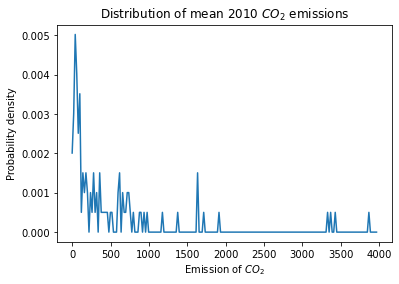

In [4]:
co2_data2010 = np.array(data[data['year'] == 2010]['co2'])

data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)
        
emission_means = []
for i in range(100):
    emission = np.random.choice(data_2010, size = 10, replace = True)
    emission_mean = np.mean(emission)
    emission_means.append(emission_mean)


x0 = max(np.min(emission_means)-100, 0)
xf = np.max(emission_means) + 100
n_bin = 200
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(emission_means, bins=x_bin, density = True)


plt.figure()
plt.plot(x, prob)

plt.xlabel('Emission of $CO_2$')
plt.ylabel('Probability density')
plt.title('Distribution of mean 2010 $CO_2$ emissions')

plt.show()

4. Randomly draw (with replacement) 100 samples of 40 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 20 samples. Repeate the process for sample sizes of 60, 80, 100, 200 countries/regions. What do you observe?

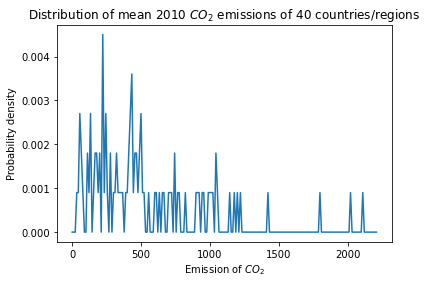

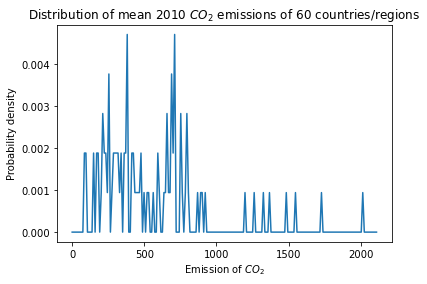

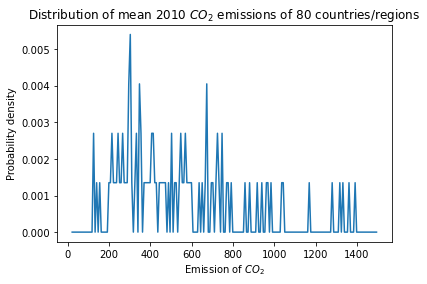

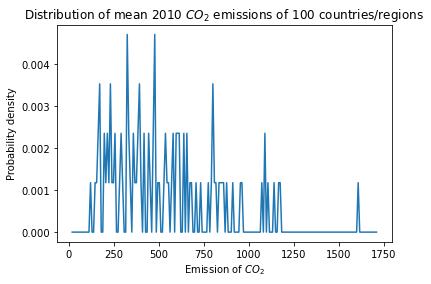

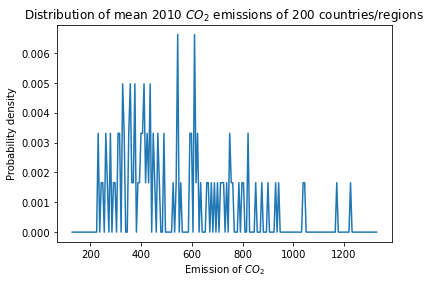

In [5]:
co2_data2010 = np.array(data[data['year'] == 2010]['co2'])
data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)
        
sample_size = [40, 60, 80, 100, 200]
for i in range(len(sample_size)):
    region_size = sample_size[i]
    emission_means = []
    for i in range(100):
        emission = np.random.choice(data_2010, size = region_size, replace = True)
        emission_mean = np.mean(emission)
        emission_means.append(emission_mean)
   

    x0 = max(np.min(emission_means)-100, 0)
    xf = np.max(emission_means) + 100
    n_bin = 200
    x = np.linspace(x0, xf, n_bin)

    delta_x = x[1] - x[0]
    x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
    prob, x_bin = np.histogram(emission_means, bins=x_bin, density = True)


    plt.figure()
    plt.plot(x, prob)

    plt.xlabel('Emission of $CO_2$')
    plt.ylabel('Probability density')
    plt.title('Distribution of mean 2010 $CO_2$ emissions of %d countries/regions' %region_size)

    plt.show()

**Result: The distribution gradually concentrate with the country number increasing. According to the central limit theorem, the distribution is more likely to the Gaussian distribution.**


With the available data, it is trivial to determine whether the population mean CO2 emissions differ between the years 2000 and 2010 – since we have access to CO2 emissions from the full population, we could simply calculate means and compare them. The subsequent problems will represent a scenario where we have access to only a sample of CO2 emissions and want to determine whether mean CO2 emissions differ between the years 2000 and 2010. We will use a t-test to do this. Your answers will vary due to random sampling. We are primarily interested in your approach and your interpretation of the results. 

5. We will start by generating our samples and testing for normality. Randomly draw (with replacement) samples of 10 countries/regions from each the years 2000 and 2010. Use `scipy.stats.normaltest()` to determine if the filtered emissions appear to be roughly normally distributed in each year. Report the p-value and conclude whether the t-test assumption of normality is satisfied (using a significance level of 0.05). 

In [6]:
import scipy

co2_data2000 = np.array(data[data['year'] == 2000]['co2'])
data_2000 = np.array([])
for i in range(len(co2_data2000)):
    if float(co2_data2000[i]):
        if np.logical_not(np.isnan(float(co2_data2000[i]))):
            data_2000 = np.append(data_2000, float(co2_data2000[i]))
    else:
        data_2000 = np.append(data_2000, 0)
        

co2_data2010 = np.array(data[data['year'] == 2010]['co2'])
data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)

emission2000 = np.random.choice(data_2000, size = 10, replace = True)
emission2010 = np.random.choice(data_2010, size = 10, replace = True)


statistic2000, p_value2000 = scipy.stats.normaltest(emission2000)
statistic2010, p_value2010 = scipy.stats.normaltest(emission2010)
print('p-value of 2000 is %f' %p_value2000)
print('p-value of 2010 is %f' %p_value2010)

p-value of 2000 is 0.061076
p-value of 2010 is 0.000001


/Users/kailejin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Result: Both p-values are smaller than 0.05. Thus the t-test assumption is not satisfied.**

6. Regardless of the results from part 5, we will proceed with our analysis. Use `scipy.stats.levene()` to determine if the samples drawn from 2000 and 2010 have equal variance. Report the p-value and conclude whether the assumption of t-test homogeneity of variances is satisfied (using a significance level of 0.05).

In [7]:
import scipy

co2_data2000 = np.array(data[data['year'] == 2000]['co2'])
data_2000 = np.array([])
for i in range(len(co2_data2000)):
    if float(co2_data2000[i]):
        if np.logical_not(np.isnan(float(co2_data2000[i]))):
            data_2000 = np.append(data_2000, float(co2_data2000[i]))
    else:
        data_2000 = np.append(data_2000, 0)
        


co2_data2010 = np.array(data[data['year'] == 2010]['co2'])
data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)

emission2000 = np.random.choice(data_2000, size = 10, replace = True)
emission2010 = np.random.choice(data_2010, size = 10, replace = True)

statistic, pvalue = scipy.stats.levene(emission2000, emission2010)
print('p-value is %f' %pvalue)
 

p-value is 0.183589


**Result: p-value is usually larger than 0.05. Thus the assumption of t-test homogeneity of variances is satisfied.**

7. Use `scipy.stats.ttest_ind()` to test if the mean CO2 emissions differ between the years 2000 and 2010 using your samples from part 5. Report the p-value you obtain and interpret the result of the t-test (using a significance level of 0.05). Explicitly state what the p-value represents. *Hint: Remember to use the correct version of the t-test depending on the sample variances. Look at the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) of `scipy.stats.ttest_ind()` for appropriate arguments.*

In [9]:
import scipy
statistic, pvalue = scipy.stats.ttest_ind(emission2000, emission2010, equal_var = True)
print('p-value is %f' %pvalue)

p-value is 0.184903


**Result: 1⃣️ P-value is larger than 0.05 for most cases. 2⃣️ P-value in this question stands for probability when the assumption of the mean 2000 and 2010 emissions is satisfied. 3⃣️ Thus, p-value is larger than 0.05 means that the t-test assumption is satisfied. The mean CO2 emissions of 2000 and 2010 are the same.**

8. Repeat parts 5-7, this time using samples of 100 countries/regions from each year. How does the change in sample size affect your (a) evaluation of model assumptions and (b) resulting t-test p-value?

In [12]:
import scipy

co2_data2000 = np.array(data[data['year'] == 2000]['co2'])
data_2000 = np.array([])
for i in range(len(co2_data2000)):
    if float(co2_data2000[i]):
        if np.logical_not(np.isnan(float(co2_data2000[i]))):
            data_2000 = np.append(data_2000, float(co2_data2000[i]))
    else:
        data_2000 = np.append(data_2000, 0)
        

co2_data2010 = np.array(data[data['year'] == 2010]['co2'])
data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)

emission2000 = np.random.choice(data_2000, size = 100, replace = True)
emission2010 = np.random.choice(data_2010, size = 100, replace = True)


statistic2000, p_value2000 = scipy.stats.normaltest(emission2000)
statistic2010, p_value2010 = scipy.stats.normaltest(emission2010)
print('p-value of 2000 is %e' %p_value2000)
print('p-value of 2010 is %e' %p_value2010)


p-value of 2000 is 4.349572e-25
p-value of 2010 is 5.602883e-21


**Result: 1⃣️ P-values are smaller than 0.05. 2⃣️ The assumption is that the CO2 emission is normally distributed. 3⃣️ Since the p-values are smaller than 0.05, even much small than original p-values. It indicates that the distribution of CO2 emission is not normally distributed.** 

In [13]:
import scipy

co2_data2000 = np.array(data[data['year'] == 2000]['co2'])
data_2000 = np.array([])
for i in range(len(co2_data2000)):
    if float(co2_data2000[i]):
        if np.logical_not(np.isnan(float(co2_data2000[i]))):
            data_2000 = np.append(data_2000, float(co2_data2000[i]))
    else:
        data_2000 = np.append(data_2000, 0)
        

co2_data2010 = np.array(data[data['year'] == 2010]['co2'])
data_2010 = np.array([])
for i in range(len(co2_data2010)):
    if float(co2_data2010[i]):
        if np.logical_not(np.isnan(float(co2_data2010[i]))):
            data_2010 = np.append(data_2010, float(co2_data2010[i]))
    else:
        data_2010 = np.append(data_2010, 0)

emission2000 = np.random.choice(data_2000, size = 100, replace = True)
emission2010 = np.random.choice(data_2010, size = 100, replace = True)

statistic, pvalue = scipy.stats.levene(emission2000, emission2010)
print('p-value is %f' %pvalue)

p-value is 0.407141


**Result: 1⃣️ The p-value is usually much lager than 0.05. 2⃣️ The assumption is that CO2 emissions of 2000 and 2010 have the homogeneous t-test variances. 3⃣️ The p-value is a little larger than original sample size. Thus the assumption of t-test homogeneity of variances is satisfied.** 

In [14]:
import scipy
statistic, p_value = scipy.stats.ttest_ind(emission2000, emission2010, equal_var = True)
print('p-value is %f' %p_value)

p-value is 0.416319


**Result: 1⃣️ P-value is larger than 0.05 for most cases. 2⃣️ The p-value is a little larger than original sample size. Thus the assumption that there is no difference of 2000 and 2010 CO2 emissions is satisfied again.**